# S08 T01: Tasca Feature Engineering

**Objectius**
 * Pre-processar les dades realitzant feature engineering
 * Interpretar els diferents conceptes de feature engineering

## Exercici 1
**Agafa un conjunt de dades de tema esportiu que t'agradi i normalitza els atributs categòrics en dummy. Estandaritza els atributs numèrics amb StandardScaler.**

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv ('laliga_player_stats_english.csv')

In [41]:
df.columns

Index(['Team', 'Position', 'Shirt number', 'Name', 'Minutes played',
       'Games played', 'Percentage of games played', 'Full games played',
       'Percentage of full games played', 'Games started',
       'Percentage of games started', 'Games where substituted',
       'Percentage of games where substituted', 'Yellow Cards', 'Red Cards',
       'Second Yellows', 'Goals scored', 'Penalties scored', 'Own goals',
       'Goals conceded while player on pitch', 'Tackles', 'Interceptions',
       'Recoveries', 'Clearances', 'Successful tackles',
       'Unssuccessful tackles', 'Last man', 'Successful duels', 'Duels lost',
       'Successful aerial challenges', 'Unsuccessful aerial challenges',
       'Offsides', 'Fouls suffered', 'Fouls committed', 'Penalties won',
       'Penalties given away', 'Handballs committed',
       'Fouls committed per card', 'Shots', 'Shots on target', 'Assists',
       'Successful dribbles', 'Unsuccessful dribbles', 'Goals scored.1',
       'From inside the a

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Team                                   556 non-null    object 
 1   Position                               556 non-null    object 
 2   Shirt number                           526 non-null    float64
 3   Name                                   556 non-null    object 
 4   Minutes played                         556 non-null    float64
 5   Games played                           556 non-null    int64  
 6   Percentage of games played             556 non-null    object 
 7   Full games played                      556 non-null    int64  
 8   Percentage of full games played        556 non-null    object 
 9   Games started                          556 non-null    int64  
 10  Percentage of games started            556 non-null    object 
 11  Games 

In [43]:
df.head()

,Team,Position,Shirt number,Name,Minutes played,Games played,Percentage of games played,Full games played,Percentage of full games played,Games started,...,Corners,Tackles.1,Duels,Man-to-man duels,Aerial duels,Passes,Short passes,Long passes,Through balls,Goals scored per attempt
0,Athletic Club,Goalkeeper,NaN,Hodei Oleaga,0.000,0,0.00%,0,0.00%,0,...,0,0,0,0,0,0.0,0.0,0,0,0
1,Athletic Club,Goalkeeper,1.0,A. Remiro,0.000,0,0.00%,0,0.00%,0,...,0,0,0,0,0,0.0,0.0,0,0,0
2,Athletic Club,Goalkeeper,13.0,Herrerín,2.790,31,82.00%,31,82.00%,31,...,0,0,25,6,19,887.0,128.0,759,1,0
3,Athletic Club,Goalkeeper,25.0,Unai Simón,630.000,7,18.00%,7,18.00%,7,...,0,0,3,2,1,155.0,49.0,106,0,0
4,Athletic Club,Defender,3.0,Núñez,1.063,12,32.00%,11,29.00%,11,...,0,15,107,38,69,536.0,457.0,78,1,0


First we need to convert the categorical variables to dummy variables

In [44]:
df.Position.unique()

array(['Goalkeeper', 'Defender', 'Midfielder', 'Forward'], dtype=object)

In [45]:
dummy = pd.get_dummies(df['Team'])

In [46]:
dummy

,Athletic Club,Atlético de Madrid,CD Leganés,D. Alavés,FC Barcelona,Getafe CF,Girona FC,Levante UD,R. Valladolid CF,RC Celta,RCD Espanyol,Rayo Vallecano,Real Betis,Real Madrid,Real Sociedad,SD Eibar,SD Huesca,Sevilla FC,Valencia CF,Villarreal CF
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
552,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
553,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
554,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [47]:
dummy2 = pd.get_dummies(df['Position'])

In [48]:
dummy2

,Defender,Forward,Goalkeeper,Midfielder
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,1,0,0,0
...,...,...,...,...
551,0,0,0,1
552,0,0,0,1
553,0,1,0,0
554,0,1,0,0


In [49]:
df = pd.concat([df, dummy, dummy2], axis=1)
df

,Team,Position,Shirt number,Name,Minutes played,Games played,Percentage of games played,Full games played,Percentage of full games played,Games started,...,Real Sociedad,SD Eibar,SD Huesca,Sevilla FC,Valencia CF,Villarreal CF,Defender,Forward,Goalkeeper,Midfielder
0,Athletic Club,Goalkeeper,NaN,Hodei Oleaga,0.000,0,0.00%,0,0.00%,0,...,0,0,0,0,0,0,0,0,1,0
1,Athletic Club,Goalkeeper,1.0,A. Remiro,0.000,0,0.00%,0,0.00%,0,...,0,0,0,0,0,0,0,0,1,0
2,Athletic Club,Goalkeeper,13.0,Herrerín,2.790,31,82.00%,31,82.00%,31,...,0,0,0,0,0,0,0,0,1,0
3,Athletic Club,Goalkeeper,25.0,Unai Simón,630.000,7,18.00%,7,18.00%,7,...,0,0,0,0,0,0,0,0,1,0
4,Athletic Club,Defender,3.0,Núñez,1.063,12,32.00%,11,29.00%,11,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,Villarreal CF,Midfielder,37.0,Iván Martín,0.000,0,0.00%,0,0.00%,0,...,0,0,0,0,0,1,0,0,0,1
552,Villarreal CF,Midfielder,42.0,Andrei Ratiu,0.000,0,0.00%,0,0.00%,0,...,0,0,0,0,0,1,0,0,0,1
553,Villarreal CF,Forward,7.0,Gerard,2.317,35,92.00%,16,42.00%,25,...,0,0,0,0,0,1,0,1,0,0
554,Villarreal CF,Forward,9.0,Bacca,1.259,33,87.00%,2,5.00%,12,...,0,0,0,0,0,1,0,1,0,0


First we remove the categorical variables and the string variables with % values.

The shirt number is not a relevant vaiable. We could fill the null values with 0, but I decide that it´s better remove the column too.

In [50]:
df_num = df.drop (['Team', 'Position','Name', 'Percentage of games played', 'Percentage of full games played', 'Percentage of games where substituted' , 'Percentage of games started', 'Shirt number'], axis=1)
df_num

,Minutes played,Games played,Full games played,Games started,Games where substituted,Yellow Cards,Red Cards,Second Yellows,Goals scored,Penalties scored,...,Real Sociedad,SD Eibar,SD Huesca,Sevilla FC,Valencia CF,Villarreal CF,Defender,Forward,Goalkeeper,Midfielder
0,0.000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2.790,31,31,31,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,630.000,7,7,7,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1.063,12,11,11,1,4,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,0.000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
552,0.000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
553,2.317,35,16,25,19,3,0,0,8,0,...,0,0,0,0,0,1,0,1,0,0
554,1.259,33,2,12,31,3,0,0,6,1,...,0,0,0,0,0,1,0,1,0,0


Null values would affect the data analisys, therefore I investigate where they are.  

In [51]:
df_num.isnull().sum()[df_num.isnull().sum()>0]

Series([], dtype: int64)

Standarize the numerical data using StandardScaler.

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
ss = StandardScaler()

df_num = ss.fit_transform(df_num)
df_num

array([[-0.52563769, -1.49404149, -1.02348382, ..., -0.45106896,
         2.95878116, -0.80917359],
       [-0.52563769, -1.49404149, -1.02348382, ..., -0.45106896,
         2.95878116, -0.80917359],
       [-0.51398596,  0.99569061,  1.91468525, ..., -0.45106896,
         2.95878116, -0.80917359],
       ...,
       [-0.51596132,  1.31694637,  0.49299054, ...,  2.21695593,
        -0.33797701, -0.80917359],
       [-0.52037979,  1.15631849, -0.83392452, ...,  2.21695593,
        -0.33797701, -0.80917359],
       [-0.51666711,  1.23663243,  0.0190923 , ...,  2.21695593,
        -0.33797701, -0.80917359]])

## Exercici 2
**Continua amb el conjunt de dades de tema esportiu que t'agradi i aplica l'anàlisi de components principals.**

In [54]:
from sklearn.decomposition import PCA

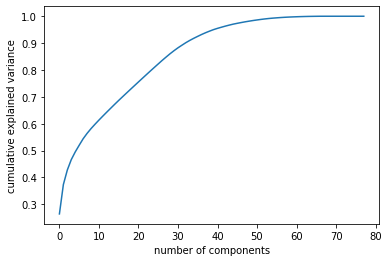

In [55]:
pca = PCA().fit(df_num)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [56]:
# Make an instance of the Model
pca = PCA(.95)
pca.fit(df_num)
print ('We have {} features which have been reduced using PCA to {} maintaining the 95% of the variance'.format(len(df_num[1,:]), pca.n_components_))

We have 78 features which have been reduced using PCA to 40 maintaining the 95% of the variance


## Exercici 3
**Continua amb el conjunt de dades de tema esportiu que t'agradi i normalitza les dades tenint en compte els outliers.**

Typically standardization is preferred to min-max normalization. However, there are some applications where min-max scaling would be preferable:
 * Neural networks often require their inputs to be bounded between 0 and 1.
 * In images, for example, where pixels can only take on a specific range of RGB values, data may have to be normalized.
 
The exercise is asking to normalize the dataframe including the outliers.

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
mms = MinMaxScaler()
df_min_max = mms.fit_transform(df_num)
df_min_max

array([[0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.00279279, 0.81578947, 0.81578947, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.00231932, 0.92105263, 0.42105263, ..., 1.        , 0.        ,
        0.        ],
       [0.00126026, 0.86842105, 0.05263158, ..., 1.        , 0.        ,
        0.        ],
       [0.00215015, 0.89473684, 0.28947368, ..., 1.        , 0.        ,
        0.        ]])